In [1]:
import nibabel as nib
from deepmotion import registration
from deepmotion.simulations import simu3d
from deepmotion.utils import montage, io_utils
import pandas as pd

In [2]:
vol_nii = nib.load('/home/cdansereau/data/cobre/cobre_raw/HC/0040123/rest/rest.nii.gz')
vol_nii.shape

(64, 64, 33, 150)

In [21]:
vol_nii.affine

array([[  3.74703026e+00,   0.00000000e+00,   1.81044444e-01,
         -1.14080368e+02],
       [  7.17121363e-02,   3.28851628e+00,  -2.18501711e+00,
         -5.90863152e+01],
       [ -1.30850002e-01,   1.80226541e+00,   3.98690677e+00,
         -9.94152679e+01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

In [3]:
#fit(source, v2w_source, target, v2w_target, mask = [], verbose = False, stride=2,dowsamp_flag=True)
coreg_vols, transfs, motion_params = registration.fit(vol_nii.get_data(),vol_nii.affine,vol_nii.get_data().mean(-1, ), vol_nii.affine )



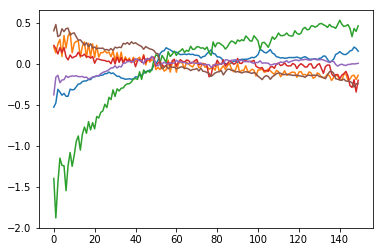

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(motion_params) 

In [ ]:
# load subjects

In [12]:
vol_nii = nib.load('/home/cdansereau/data/deepmotion/cobre/xp_2016_07_27_final/rest_'+subj_id+'.nii.gz')



NameError: name 'nib' is not defined

In [28]:
df = pd.DataFrame(motion_params)
df.to_csv

In [8]:

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [33]:
ls /home/cdansereau/data/cobre/cobre_ln_cor/

HC/  SZ/


In [67]:
from os import listdir
from os.path import isdir
from os import mkdir
mypath = '/home/cdansereau/data/cobre/cobre_raw/HC/'

for subj_id in listdir(mypath):
    output_folder = '/home/cdansereau/data/cobre/cobre_ln_cor/HC/'+subj_id+'/'
    if not isdir(output_folder):
        mkdir(output_folder)
        print 'create new folder', output_folder
    vol_nii = nib.load('/home/cdansereau/data/cobre/cobre_raw/HC/'+subj_id+'/rest/rest.nii.gz')
    coreg_vols, transfs, motion_params = registration.fit(vol_nii.get_data(),vol_nii.affine,vol_nii.get_data().mean(-1, ), vol_nii.affine )
    df = pd.DataFrame(motion_params)
    df.to_csv(output_folder + 'motion_params.csv')
    coreg_vol_nii = nib.Nifti1Image(coreg_vols,vol_nii.affine)
    coreg_vol_nii.to_filename(output_folder + 'rest_ln.nii.gz')
    io_utils.write({'vol':coreg_vols, 'v2w_affine':vol_nii.affine,'transfs':transfs, 'motion_params':motion_params},
                   output_folder+ 'data_ln.hd5')

create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040065/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040115/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040018/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040134/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040033/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040076/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040095/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040144/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040139/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040043/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040062/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040118/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040068/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/HC/0040086/
create

In [8]:
from os import listdir

mypath = '/home/cdansereau/data/schizo/resample/'

listdir(mypath)


['fmri_SZ0040007_session1_run1_n_confounds.tsv.gz',
 'fmri_HC0040026_session1_run1_n.nii.gz',
 'fmri_HC0040058_session1_run1_n_confounds.tsv.gz',
 'fmri_SZ0040117_session1_run1_n_extra.mat',
 'fmri_SZ0040010_session1_run1_n_confounds.tsv.gz',
 'fmri_SZ0040042_session1_run1_n_extra.mat',
 'fmri_SZ0040029_session1_run1_n.nii.gz',
 'fmri_HC0040054_session1_run1_n.nii.gz',
 'fmri_HC0040031_session1_run1_n_extra.mat',
 'fmri_SZ0040022_session1_run1_n.nii.gz',
 'fmri_HC0040061_session1_run1_n_confounds.tsv.gz',
 'fmri_HC0040131_session1_run1_n.nii.gz',
 'fmri_SZ0040029_session1_run1_n_confounds.tsv.gz',
 'fmri_HC0040043_session1_run1_n_extra.mat',
 'fmri_HC0040076_session1_run1_n_confounds.tsv.gz',
 'fmri_HC0040116_session1_run1_n_extra.mat',
 'fmri_HC0040024_session1_run1_n_extra.mat',
 'fmri_SZ0040047_session1_run1_n.nii.gz',
 'fmri_SZ0040037_session1_run1_n_confounds.tsv.gz',
 'fmri_SZ0040122_session1_run1_n.nii.gz',
 'fmri_HC0040068_session1_run1_n_confounds.tsv.gz',
 'fmri_HC0040031_ses

In [35]:
from os import listdir
from os.path import isdir
from os import mkdir
mypath = '/home/cdansereau/data/schizo/resample/'

reload(registration)

for subj_id in listdir(mypath):
    if subj_id.endswith(".nii.gz"):
        
        subj_name = subj_id[5:-23]
        output_folder = '/home/cdansereau/data/schizo/coreg/'+subj_name+'/'
        
        if not isdir(output_folder):
            mkdir(output_folder)
            print 'create new folder', output_folder
        
        
        
        
        vol_nii = nib.load(mypath + subj_id)
        
        # motion
        tsv_file =  subj_id[:-7] + '_confounds.tsv.gz'
        motion_data = pd.read_csv(mypath+tsv_file,sep='\t')
        motion_data = motion_data.get_values()[:,:6]
        
        coreg_vol, transfs = registration.transform(vol_nii.get_data(), motion_data, vol_nii.affine)
        
        io_utils.write({'vol_raw':vol_nii.get_data(), 'vol':coreg_vols, 'v2w_affine':vol_nii.affine,'transfs':transfs, 'motion_params':motion_params},
                       output_folder+ 'data_ln.hd5')
        
        
        #output_folder = '/home/cdansereau/data/cobre/cobre_ln_cor/HC/'+subj_id+'/'


    

create new folder /home/cdansereau/data/schizo/coreg/SZ0040029/
create new folder /home/cdansereau/data/schizo/coreg/HC0040054/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040022/
create new folder /home/cdansereau/data/schizo/coreg/HC0040131/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040047/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040122/
create new folder /home/cdansereau/data/schizo/coreg/HC0040031/
create new folder /home/cdansereau/data/schizo/coreg/HC0040048/
create new folder /home/cdansereau/data/schizo/coreg/HC0040043/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040110/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040075/
create new folder /home/cdansereau/data/schizo/coreg/HC0040114/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040007/
create new folder /home/cdansereau/data/schizo/coreg/HC0040014/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040010/
create new folder /home/cdansereau/data/

create new folder /home/cdansereau/data/schizo/coreg/HC0040135/
create new folder /home/cdansereau/data/schizo/coreg/HC0040050/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040143/
create new folder /home/cdansereau/data/schizo/coreg/HC0040147/
create new folder /home/cdansereau/data/schizo/coreg/HC0040091/
create new folder /home/cdansereau/data/schizo/coreg/HC0040062/
create new folder /home/cdansereau/data/schizo/coreg/HC0040107/
create new folder /home/cdansereau/data/schizo/coreg/HC0040069/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040103/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040108/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040003/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040008/
create new folder /home/cdansereau/data/schizo/coreg/HC0040086/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040071/
create new folder /home/cdansereau/data/schizo/coreg/SZ0040082/
create new folder /home/cdansereau/data/

In [33]:
def test_transform(vol, params, v2w, inv_affine=False, rotation_unit='deg'):
    nframes = 1
    coreg_vols = []
    transf = []
    
    if len(params.shape) > 1:
        nframes = params.shape[0]

        for frame in range(nframes):
            cor_vol, aff = registration.transform(vol[...,frame], params[frame,...], v2w)
            coreg_vols.append(cor_vol)
            transf.append(aff)
    else:
        coreg_vols, transf = registration.transform(vol, params, v2w)
        
    return np.stack(coreg_vols), np.stack(transf)

coreg_vols, transf = test_transform(vol_nii.get_data(), motion_data, vol_nii.affine)

In [34]:
import numpy as np
np.stack(transf[0,...]).shape

(4, 4)

In [69]:
from os import listdir
from os.path import isdir
from os import mkdir
mypath = '/home/cdansereau/data/cobre/cobre_raw/SZ/'

for subj_id in listdir(mypath):
    output_folder = '/home/cdansereau/data/cobre/cobre_ln_cor/SZ/'+subj_id+'/'
    if not isdir(output_folder):
        mkdir(output_folder)
        print 'create new folder', output_folder
    vol_nii = nib.load('/home/cdansereau/data/cobre/cobre_raw/SZ/'+subj_id+'/rest/rest.nii.gz')
    coreg_vols, transfs, motion_params = registration.fit(vol_nii.get_data(),vol_nii.affine,vol_nii.get_data().mean(-1, ), vol_nii.affine )
    df = pd.DataFrame(motion_params)
    df.to_csv(output_folder + 'motion_params.csv')
    coreg_vol_nii = nib.Nifti1Image(coreg_vols,vol_nii.affine)
    coreg_vol_nii.to_filename(output_folder + 'rest_ln.nii.gz')
    io_utils.write({'vol':coreg_vols, 'v2w_affine':vol_nii.affine,'transfs':transfs, 'motion_params':motion_params},
                   output_folder+ 'data_ln.hd5')

create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040011/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040088/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040082/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040029/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040105/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040008/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040075/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040002/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040137/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040047/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040040/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040037/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040078/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040096/
create

/home_sq/cdansereau/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home_sq/cdansereau/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040110/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040060/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040041/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040073/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040004/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040109/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040079/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040097/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040103/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040003/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040009/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040046/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040117/
create new folder /home/cdansereau/data/cobre/cobre_ln_cor/SZ/0040010/
create

In [ ]:
# load data

def load_subj(source_folder):
    if not isdir(source_folder):
        print 'Error folder does not exist', source_folder
    else: 
        df = pd.read_csv(source_folder+'motion_params.csv')
        vol_nii = nib.load(source_folder+'rest_ln.nii.gz')
    
load_subj('/home/cdansereau/data/cobre/cobre_ln_cor/HC/0040057/')

In [55]:
# Train on real data



NameError: name 'ls' is not defined

In [68]:
ls /home/cdansereau/data/cobre/cobre_ln_cor/HC/

0040013/  0040030/  0040051/  0040063/  0040090/  0040115/  0040128/  0040141/
0040014/  0040031/  0040052/  0040065/  0040091/  0040116/  0040129/  0040144/
0040017/  0040033/  0040053/  0040066/  0040093/  0040118/  0040130/  0040146/
0040018/  0040035/  0040054/  0040067/  0040095/  0040119/  0040131/  0040147/
0040019/  0040036/  0040055/  0040068/  0040102/  0040120/  0040134/
0040020/  0040038/  0040056/  0040069/  0040104/  0040121/  0040135/
0040023/  0040043/  0040057/  0040074/  0040107/  0040123/  0040136/
0040024/  0040045/  0040058/  0040076/  0040111/  0040124/  0040138/
0040026/  0040048/  0040061/  0040086/  0040113/  0040125/  0040139/
0040027/  0040050/  0040062/  0040087/  0040114/  0040127/  0040140/


In [65]:
dd = io_utils.load('/home/cdansereau/data/cobre/cobre_ln_cor/HC/0040057/test_dat.hd5')

('List of arrays in this file: ', [u'motion_params', u'transfs', u'vol'])
